In [7]:
#import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cartopy.crs as ccrs
from cartopy import config
#import pandas as pd
import xarray as xr
#import datetime as dt

In [8]:
ds = xr.open_dataset('isccp_c2.nc')
print(ds)

<xarray.Dataset>
Dimensions:    (time: 90, lat: 72, lon: 144)
Dimensions without coordinates: time, lat, lon
Data variables: (12/15)
    EPOCH      (time, lat, lon) float32 ...
    LATITUDE   (time, lat, lon) float32 ...
    LONGITUDE  (time, lat, lon) float32 ...
    SFC_CODE   (time, lat, lon) float32 ...
    CLD_AMT    (time, lat, lon) float32 ...
    PRS_CLDT   (time, lat, lon) float32 ...
    ...         ...
    FQ_LCLD    (time, lat, lon) float32 ...
    FQ_MCLD    (time, lat, lon) float32 ...
    FQ_HCLD    (time, lat, lon) float32 ...
    TMP_SSFC   (time, lat, lon) float32 ...
    RFL_SFC    (time, lat, lon) float32 ...
    SNOW_ICE   (time, lat, lon) float32 ...


In [9]:
sfc_temp = ds['TMP_SSFC']
jan_temp = sfc_temp[18]
jul_temp = sfc_temp[23]
jan = np.array(jan_temp)
jul = np.array(jul_temp)
ann = np.subtract(jan,jul)
abs(ann)
lat = np.linspace(-90,90,72)
lon = np.linspace(0,360,144)
print(jan_temp)

<xarray.DataArray 'TMP_SSFC' (lat: 72, lon: 144)>
array([[243.7, 243.7, 243.7, ..., 244.5, 244.5, 244.5],
       [245.3, 245.3, 245.3, ..., 247.7, 247.7, 247.7],
       [246.1, 246.1, 246.1, ..., 246.9, 246.9, 246.9],
       ...,
       [256. , 256. , 256. , ..., 253.9, 253.9, 253.9],
       [251.7, 251.7, 251.7, ..., 250.9, 250.9, 250.9],
       [249.3, 249.3, 249.3, ..., 249.3, 249.3, 249.3]], dtype=float32)
Dimensions without coordinates: lat, lon
Attributes:
    title:    Mean Skin Surface Temperature
    units:    K


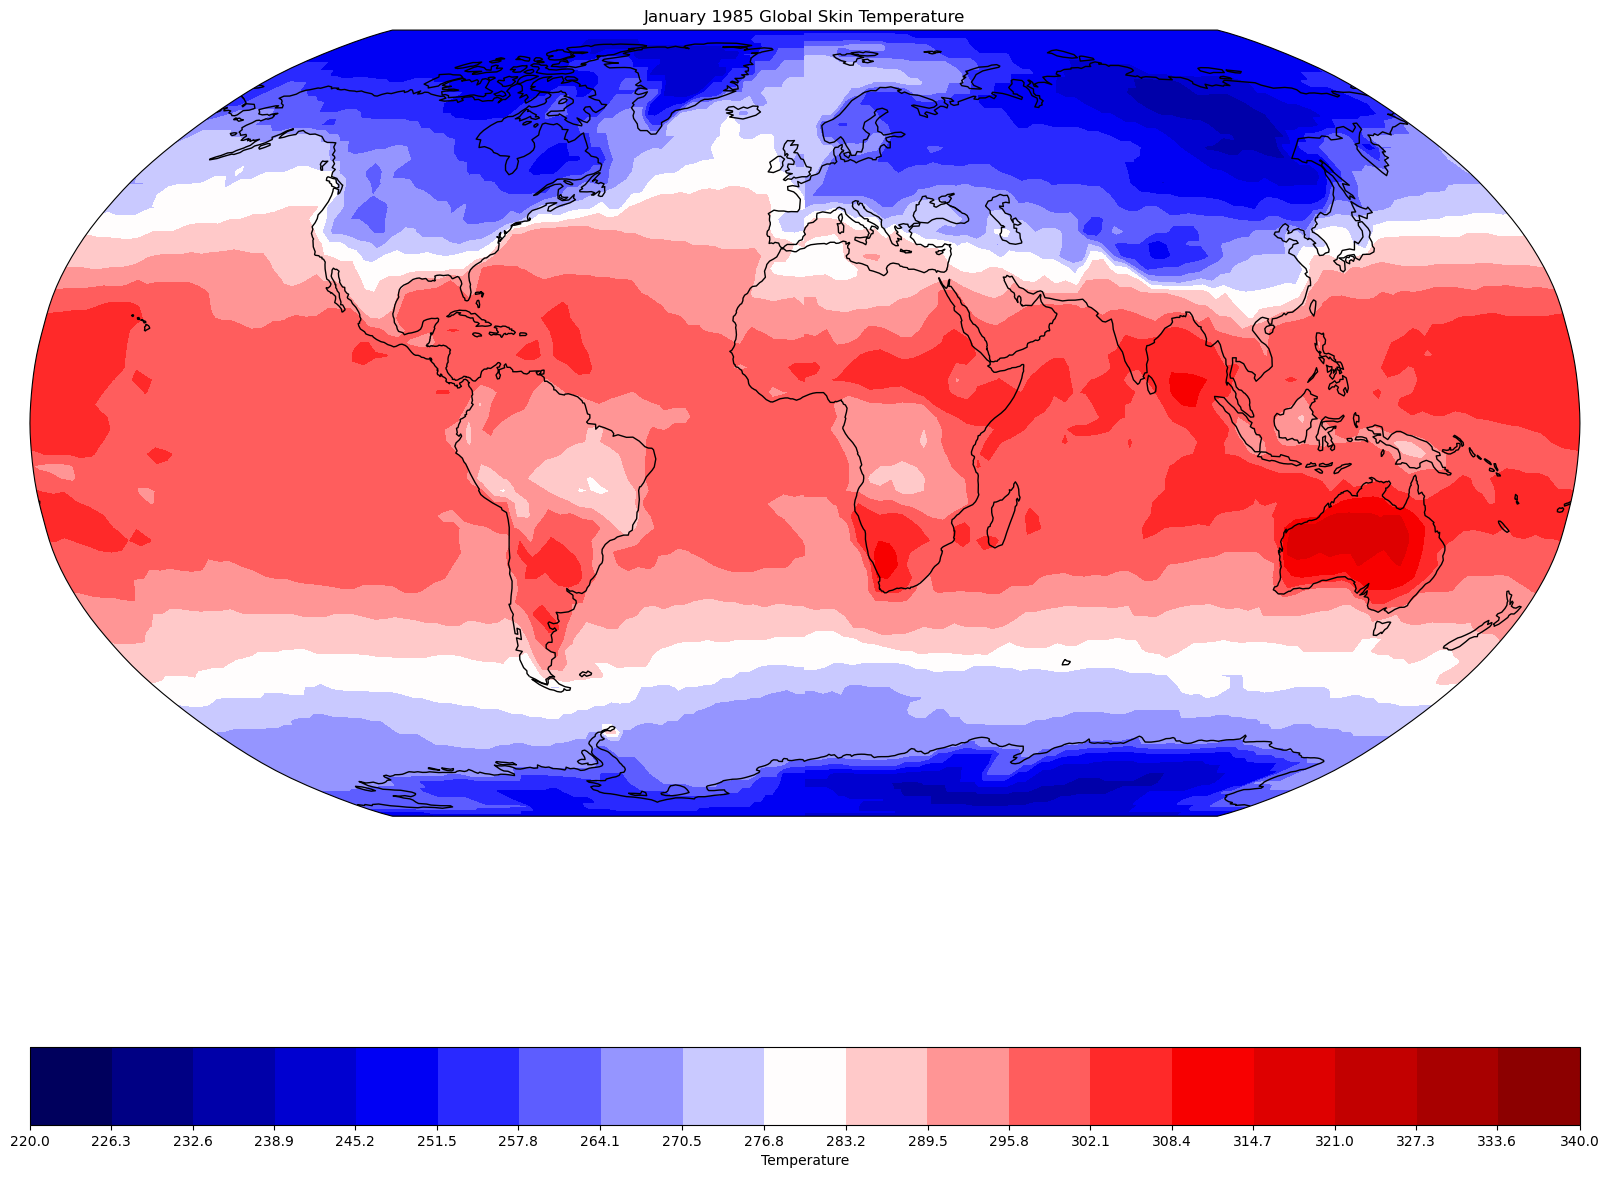

In [6]:
fig = plt.figure(figsize =(20,20))
ax = plt.axes(projection=ccrs.Robinson())
colormap = cm.get_cmap('seismic')
jan_85 = plt.contourf(lon, lat, jan_temp, np.linspace(220,340,20), cmap = colormap, transform=ccrs.PlateCarree())
#plt.clabel(jan_85, colors = 'black')
cbar = plt.colorbar(jan_85, orientation = 'horizontal')
cbar.set_label('Temperature')
cbar.set_ticks([220.0, 226.3, 232.6, 238.9, 245.2, 251.5, 257.8, 264.1, 270.5, 276.8, 283.2, 289.5, 295.8, 302.1, 308.4, 314.7, 321.0, 327.3, 333.6, 340.0])
ax.coastlines()
ax.set_title('January 1985 Global Skin Temperature')
plt.show()

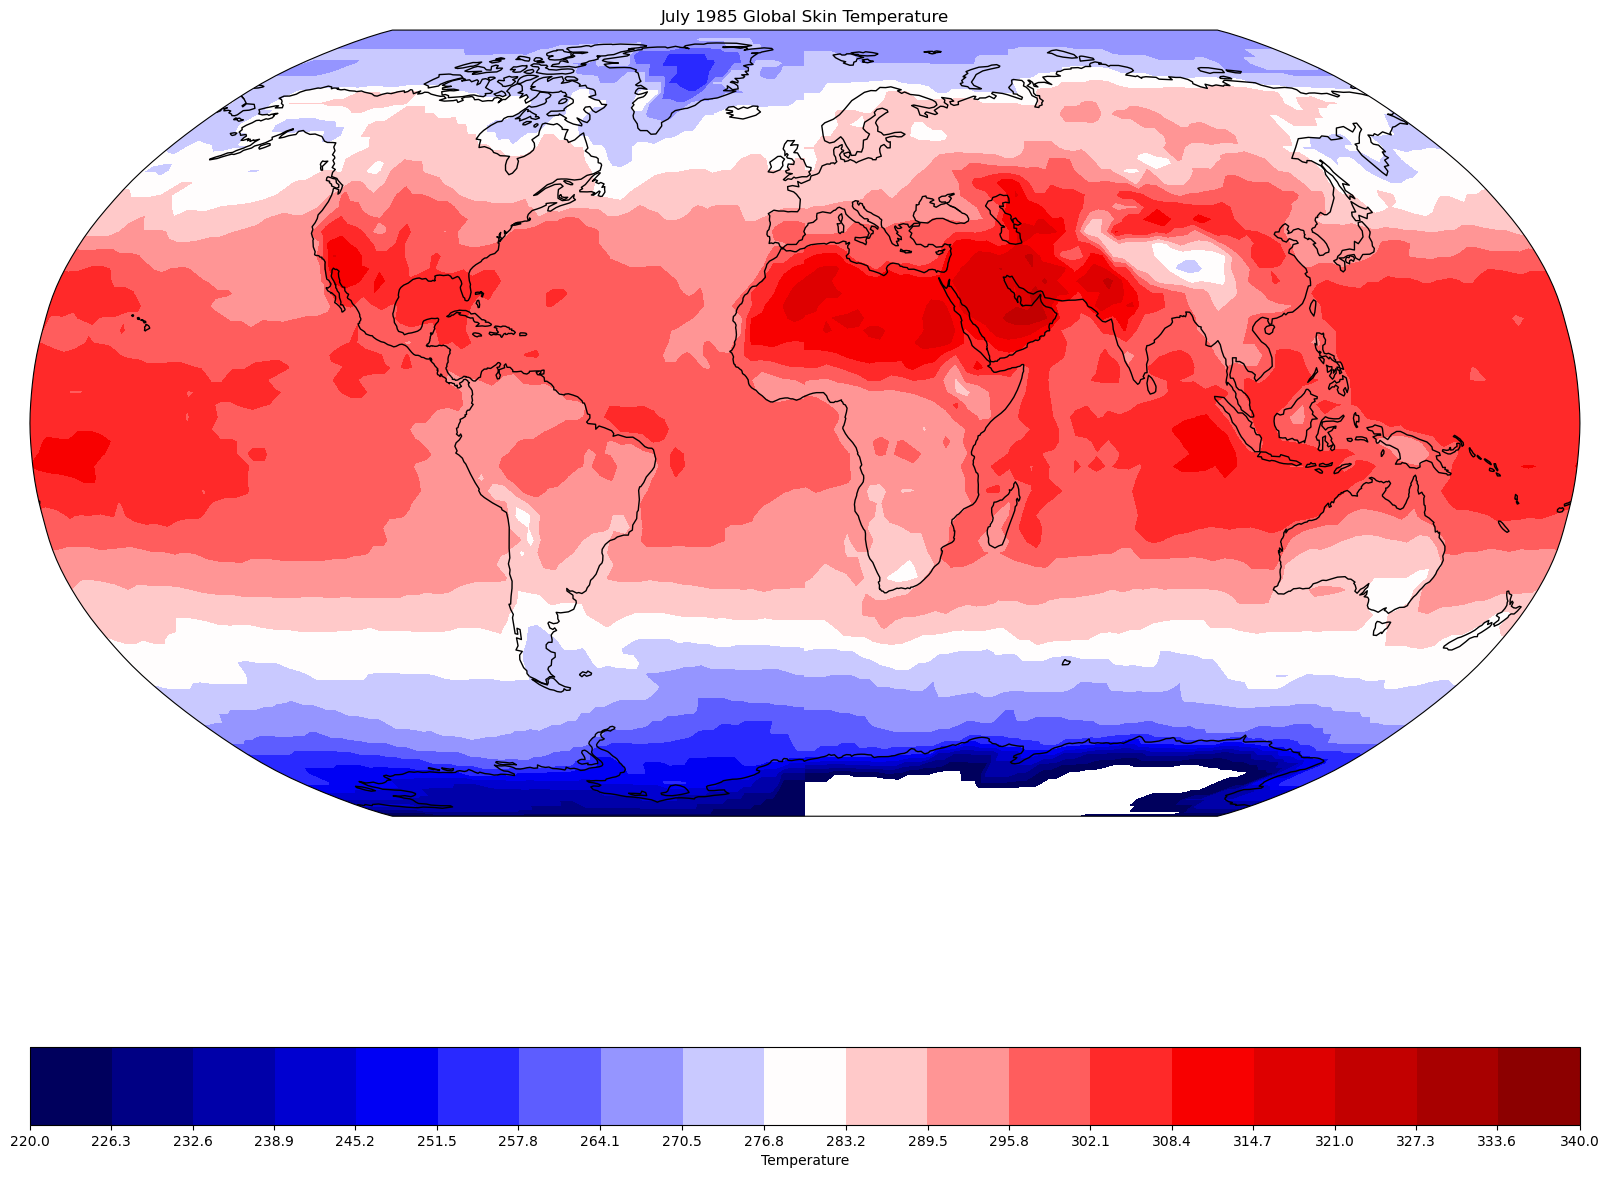

In [136]:
fig = plt.figure(figsize =(20,20))
ax = plt.axes(projection=ccrs.Robinson())
colormap = cm.get_cmap('seismic')
jul_85 = plt.contourf(lon, lat, jul_temp, np.linspace(220,340,20), cmap = colormap, transform=ccrs.PlateCarree())
#plt.clabel(jul_85, colors='black')
cbar = plt.colorbar(jul_85, orientation = 'horizontal')
cbar.set_label('Temperature')
cbar.set_ticks([220.0, 226.3, 232.6, 238.9, 245.2, 251.5, 257.8, 264.1, 270.5, 276.8, 283.2, 289.5, 295.8, 302.1, 308.4, 314.7, 321.0, 327.3, 333.6, 340.0])
ax.coastlines()
ax.set_title('July 1985 Global Skin Temperature')
plt.show()

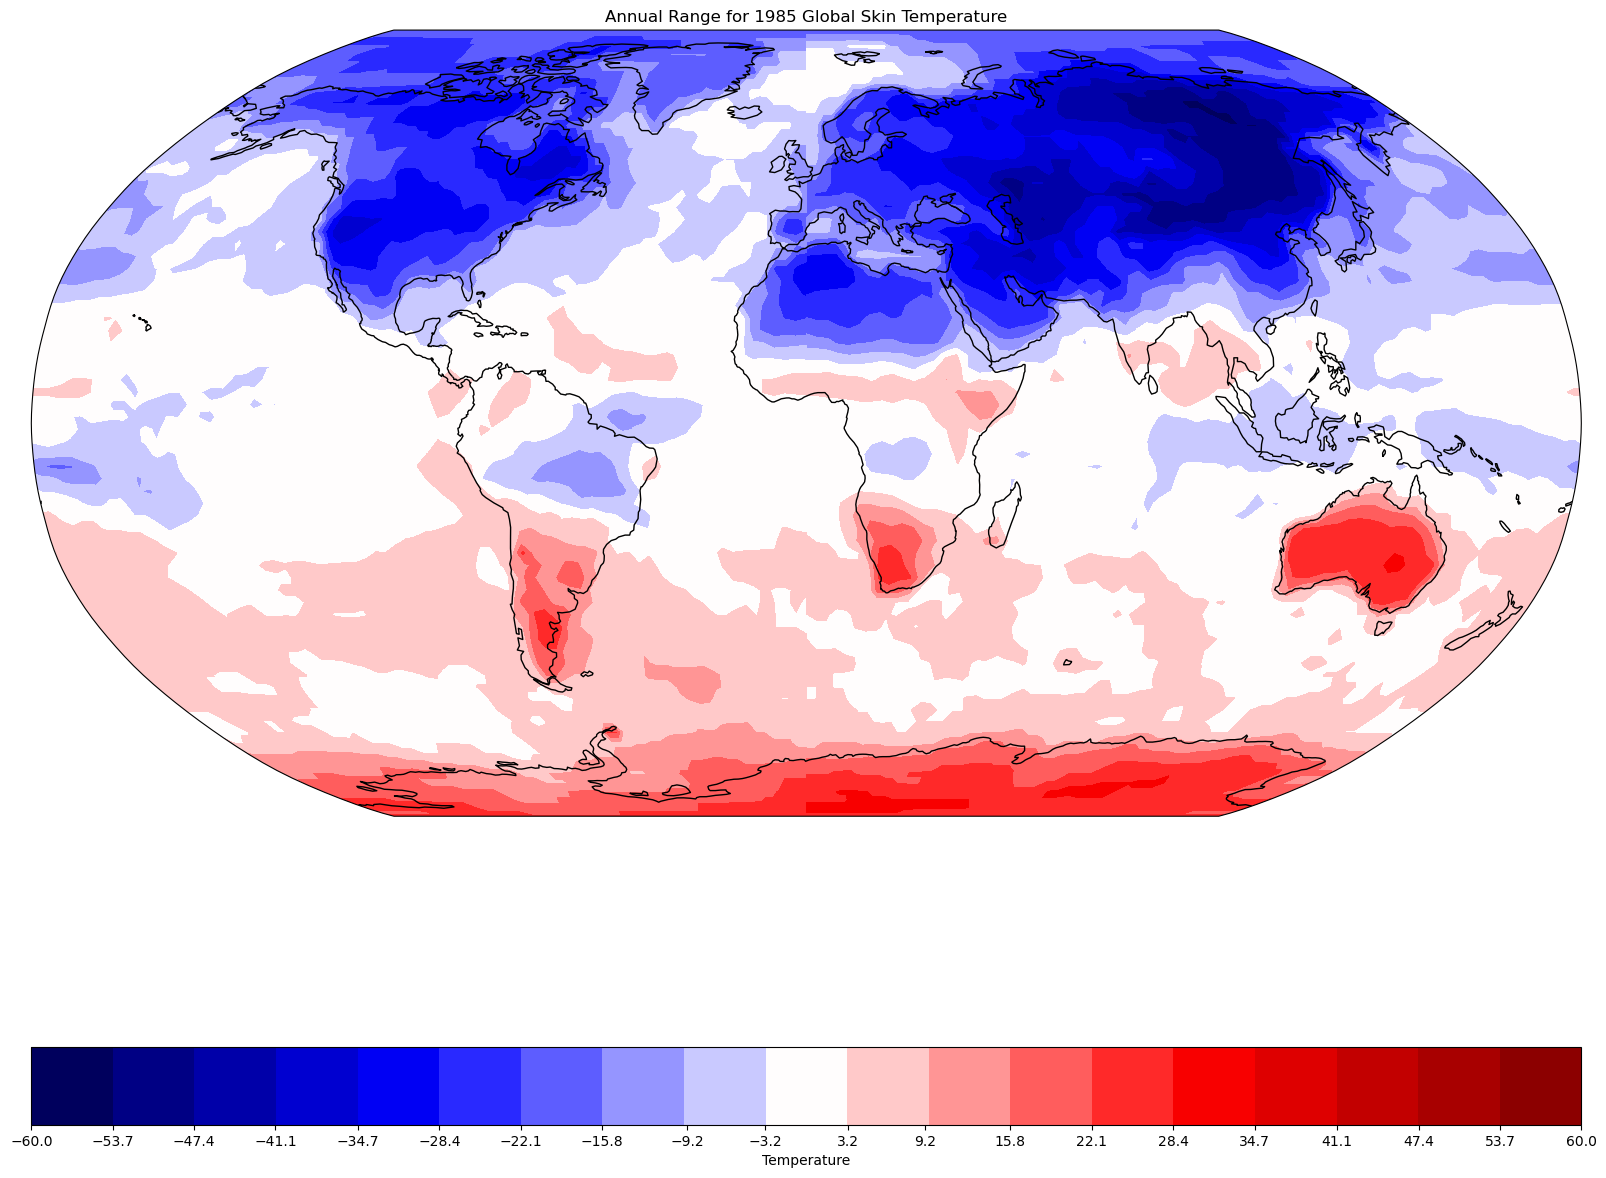

<Figure size 640x480 with 0 Axes>

In [139]:
fig = plt.figure(figsize =(20,20))
ax = plt.axes(projection=ccrs.Robinson())
colormap = cm.get_cmap('seismic')
ann_range = plt.contourf(lon, lat, ann, np.linspace(-60,60,20), cmap = colormap, transform=ccrs.PlateCarree())
#plt.clabel(ann_range, colors = 'black')
cbar = plt.colorbar(ann_range, orientation = 'horizontal')
cbar.set_label('Temperature')
cbar.set_ticks([-60.0, -53.7, -47.4, -41.1, -34.7, -28.4, -22.1, -15.8, -9.2, -3.2, 3.2, 9.2, 15.8, 22.1, 28.4, 34.7, 41.1, 47.4, 53.7, 60.0])
ax.coastlines()
ax.set_title('Annual Range for 1985 Global Skin Temperature')
plt.show()
plt.savefig('annual_range.png')

In [ ]:
'''
Answers to Questions:
1. See plots above

2. Temperature range is a maximum in eastern Asia (specifically in northeastern Russia), western Kazakhstan,
    and Australia. Northeastern Russia has such a wide range because of the frigid winters and the somewhat
    warm summers. Kazakhstan similarly must see cool temperatures in the winter, and very warm ones in the
    summer. Australia has a large region of desert which means it gets very hot in the summer and pretty cool
    at night, especially in the winter.
    
3. The areas with the lowest annual range are mainly in the oceans, but also over land in some limited areas,
    such as India, South America, and Africa. The reason for this is because the sun is shining on these areas
    equally throughout the whole year. These regions don't really have winter or summer, they just have warm 
    weather year-round.
'''